In [1]:
# Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KernelDensity
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

### Part A

Kernel Density Estimation on sklearn digits

In [2]:
# Load data
digits = load_digits()
X = digits.data

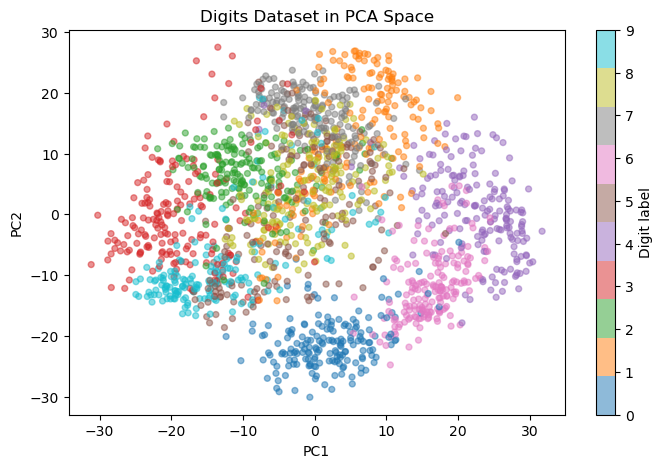

In [3]:
# PCA space
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits.target, s=18, alpha=0.5, cmap='tab10')
plt.colorbar(label="Digit label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Digits Dataset in PCA Space")
plt.savefig("media/pca_digits.png")
plt.show()

Best bandwidth: 2.9764


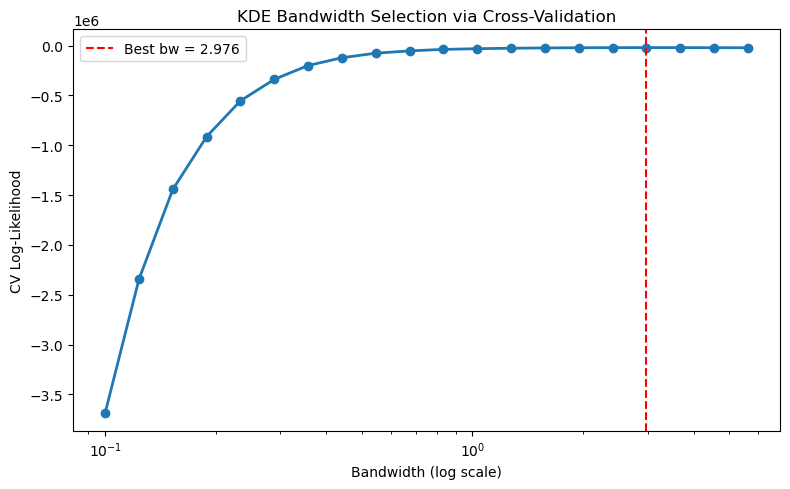

In [4]:
# Bandwidth tuning with GridSearchCV
bandwidths = np.logspace(-1, 0.75, 20)
cv = KFold(n_splits=5, shuffle=True)

grid = GridSearchCV(
    KernelDensity(kernel="gaussian"),
    param_grid={"bandwidth": bandwidths},
    cv=cv
)
grid.fit(X_pca)

kde_best = grid.best_estimator_
bw_best = kde_best.get_params()["bandwidth"]
print(f"Best bandwidth: {bw_best:.4f}")

# Plot CV log-likelihood vs bandwidth

# Extract the tested bandwidths and their mean CV scores
bw_list = grid.cv_results_["param_bandwidth"].data.astype(float)
scores = grid.cv_results_["mean_test_score"]

plt.figure(figsize=(8, 5))
plt.semilogx(bw_list, scores, marker='o', lw=2)
plt.xlabel("Bandwidth (log scale)")
plt.ylabel("CV Log-Likelihood")
plt.title("KDE Bandwidth Selection via Cross-Validation")

# Plot best bandwidth as red dashed line
plt.axvline(bw_best, color='red', linestyle='--', label=f"Best bw = {bw_best:.3f}")
plt.legend()

plt.tight_layout()
plt.savefig("media/kde_bandwidth_cv.png")
plt.show()

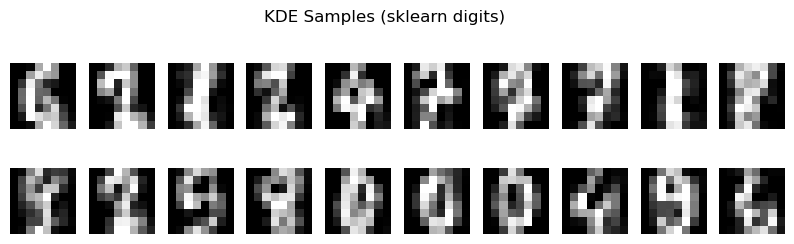

In [5]:
# Sample new digits
num_samples = 20
samples_pca = kde_best.sample(num_samples)
samples = pca.inverse_transform(samples_pca)

# Clip for valid pixel range (since KDE can allow z<0 | z>16)
samples = np.clip(samples, 0, 16)

# Plot generated digits
fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))  # wide + short
for ax, img in zip(axes.flatten(), samples):
    ax.imshow(img.reshape(8, 8), cmap='gray')
    ax.axis("off")

plt.suptitle("KDE Samples (sklearn digits)", y=1.05)
plt.savefig("media/kde_samples.png", dpi=300, bbox_inches="tight")
plt.show()
